In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2

### Directories

In [3]:
train_directory = 'Data/chest_xray/chest_xray/train'
test_directory = 'Data/chest_xray/chest_xray/test'
val_directory = 'Data/chest_xray/chest_xray/val'

### X-RAY IMAGE FOR NORMAL VS PNEUMONIA 

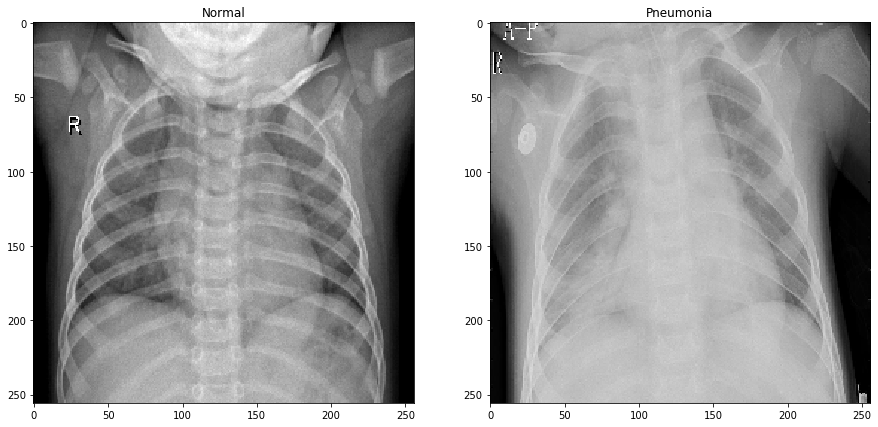

In [5]:
# Loading image:
fig, ax = plt.subplots(nrows = 1, ncols=2,figsize=(15,15))
img1 = load_img(f'{train_directory}/NORMAL/IM-0137-0001.jpeg', target_size=(256,256))
ax[0].imshow(img1)
ax[0].set_title('Normal');


img2 = load_img(f'{train_directory}/PNEUMONIA/person1896_bacteria_4788.jpeg', target_size=(256,256))
ax[1].imshow(img2)
ax[1].set_title('Pneumonia');


As you can see the two x-ray photos of two patients chest scan, the person with pneumonia had more white spots in their x-ray as it is probably indication of fluid in their lungs.

### Normal vs Pneumonia (train set)

Text(0.5, 1.0, 'NORMAL VS PNEUMONIA')

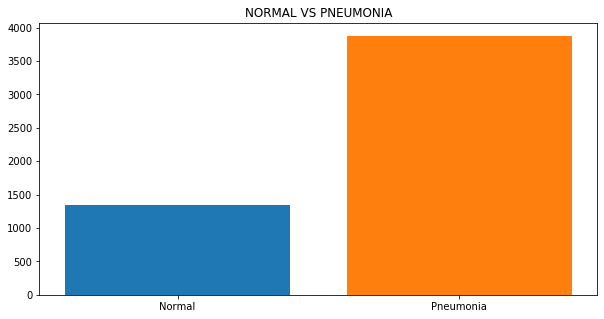

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(x='Normal', height=len(os.listdir('Data/chest_xray/chest_xray/train/NORMAL')));
plt.bar(x='Pneumonia', height=len(os.listdir('Data/chest_xray/chest_xray/train/PNEUMONIA')));
plt.title('NORMAL VS PNEUMONIA')

We can see a high class imbalance as more dataset revolves around pneumonia patients than normal patients. We will need to figure out a way to resample this so that we can solve class imbalance issue. One of the approach we will be implementing is to use class_weight.

Text(0.5, 1.0, 'NORMAL VS PNEUMONIA (percentage)')

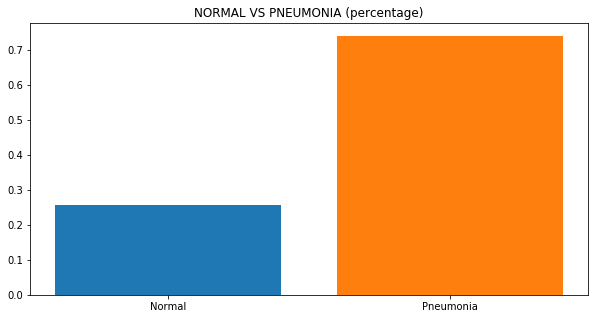

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
total = len(os.listdir('CellData/chest_xray/train/NORMAL')) + len(os.listdir('CellData/chest_xray/train/PNEUMONIA'))
plt.bar(x='Normal', height=len(os.listdir('Data/chest_xray/chest_xray/train/NORMAL'))/total);
plt.bar(x='Pneumonia', height=len(os.listdir('Data/chest_xray/chest_xray/train/PNEUMONIA'))/total);
plt.title('NORMAL VS PNEUMONIA (percentage)')

In [13]:
ratio = len(os.listdir('Data/chest_xray/chest_xray/train/PNEUMONIA'))/len(os.listdir('Data/chest_xray/chest_xray/train/NORMAL'))
ratio

2.8882265275707897

In this case, we know the ratio is roughly around 3:1 in Pneumonia : Normal cases. So bringing the Normal class class_weight by 3 should resolve this issue. 